# Statisical Model for Predicting Above Average Academic Performance

**Description:**

The purpose of this project is to build a statisitcal model based on a logistic classification algorithm as a multivariate approach for predicting above average academic performance by students across three different metrics: math, reading, and writing.

Results of the binary classification algorithm will be used to determine which major factors contribute/ is associated with above average exam performance based on estimations of the logistic regression parameters of each factor with respect to: gender, race/ethnicity, parental level of education, lunch, and whether students took a test preparation course.

Dummy variables were created for each class in a category in the algorithm; classes of the highest samples were omitted as reference groups based on results of EDA.

Significance of each factor in predicting above average academic performance of students will be evaluated at a confidence level of 95% with a 0.05 significance threshold for each of the three logistic model in measuring above average performance in math, reading, and writing.

## Import libaries and load dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm


# Embedding static image of plot in notebook
%matplotlib inline 

In [2]:
# load student performance exam dataset
student_performance = pd.read_csv("exams.csv")
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Part 1: EDA - Exploratory Data Analysis

### 1. Renaming the columns

In [3]:
# Renaming replacing spaces in column name with "_"
student_performance.columns = [col.replace(" ", "_") for col in student_performance.columns]
student_performance.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### 2. Information about the data

In [4]:
# getting the size/dimensionality of the dataset
student_performance.shape

(1000, 8)

In [5]:
# retrieving information about the dataset
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# checking for any missing values
student_performance.isnull().any()

gender                         False
race/ethnicity                 False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

### 3. Descriptive Statistics & Visualizing the Data

#### **3.1. Descriptive Statistics of Student Exam Scores**

In [7]:
# Descriptive statistic of math, reading, and writing scores of students
summary = student_performance.describe().round(1)
summary

,math_score,reading_score,writing_score
count,1000.0,1000.0,1000.0
mean,66.4,69.0,67.7
std,15.4,14.7,15.6
min,13.0,27.0,23.0
25%,56.0,60.0,58.0
50%,66.5,70.0,68.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [8]:
# Average exam scores by gender
student_performance.groupby("gender").agg(np.mean).round(1)

,math_score,reading_score,writing_score
gender,,,
female,63.2,71.9,71.7
male,69.4,66.3,64.0


In [9]:
# Average exam scores by race/ethnicity
student_performance.groupby("race/ethnicity").agg(np.mean).round(1)

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,65.2,68.6,67.0
group B,63.2,67.1,65.7
group C,63.1,66.4,64.5
group D,69.3,72.1,72.3
group E,74.5,72.5,70.2


In [10]:
# Average exam scores by parental level of education
student_performance.groupby("parental_level_of_education").agg(np.mean).round(1)

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,69.5,71.0,70.1
bachelor's degree,71.5,74.0,74.4
high school,65.2,67.4,64.8
master's degree,71.6,75.4,75.9
some college,65.3,68.0,66.7
some high school,60.7,64.4,62.5


In [11]:
# Average exam scores by lunch
student_performance.groupby("lunch").agg(np.mean).round(1)

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.5,63.2,60.9
standard,70.6,72.1,71.4


In [12]:
# Average exam scores by whether studen has taken a test preparation score
student_performance.groupby("test_preparation_course").agg(np.mean).round(1)

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.7,74.1,74.7
none,64.7,66.4,64.2


#### **3.2. Visualizing Categorical Data**

In [13]:
# getting list of categorical variables
categorical_var = list(student_performance.columns)
categorical_var = categorical_var[:-3]
print(categorical_var)

['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


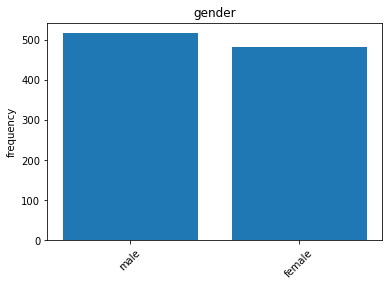

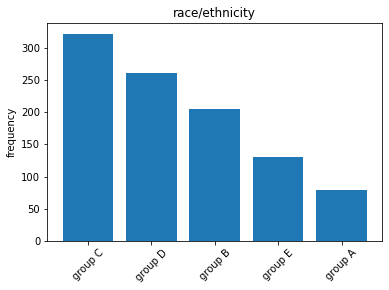

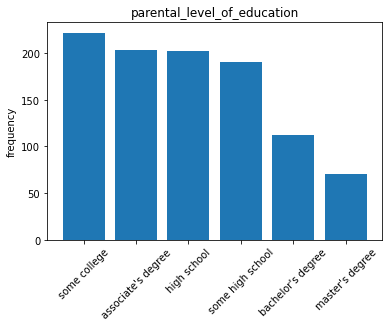

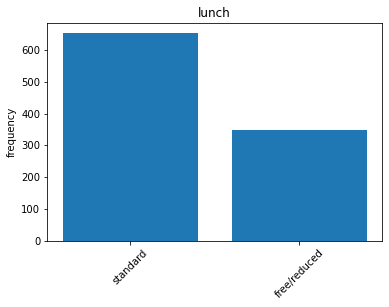

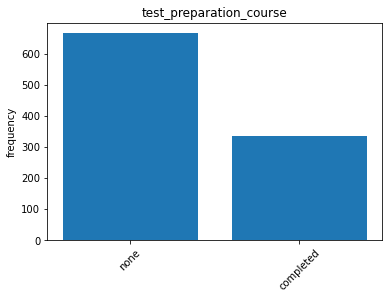

In [14]:
# Creating a function for plotting a bar graph
def bar_graph(cat):
    feature = student_performance[cat]

    yvals = feature.value_counts()
    xvals = feature.value_counts().index

    plt.ylabel("frequency")
    plt.title(cat)

    return plt.bar(xvals, yvals)


# displying a bar chart for each categorical variable in the dataset
for category in categorical_var:
    # create a new figure
    fig = plt.figure() 
    # call to bar_graph function to plot bar graph to figure
    bar_graph(category)
    # retrieving x-axis object
    x = plt.gca().xaxis
    # iterating through x-axis label to rotate tick labels to prevent overlap
    for item in x.get_ticklabels():
	    item.set_rotation(45)


#### **3.3. Visualizing Quantitative Data**

##### Overall Distribution of Exam Scores

<AxesSubplot:>

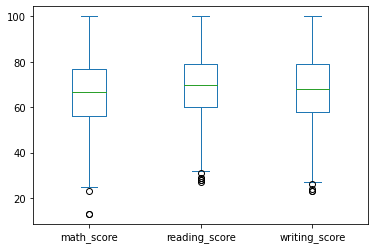

In [15]:
# visualizing the overall distribution of each performance metric
student_performance.plot.box()

##### Correlation Matrix of Student Performance

Text(0.5, 1.0, 'Correlation Heatmap of Exam Performances')

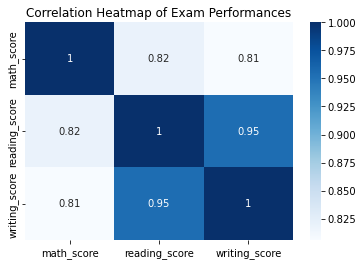

In [16]:
# Displaying the correlation matrix between different performance metrics
sns.heatmap(student_performance.corr(), annot=True, cmap = "Blues").set_title("Correlation Heatmap of Exam Performances")

##### Distribution of Student Performance

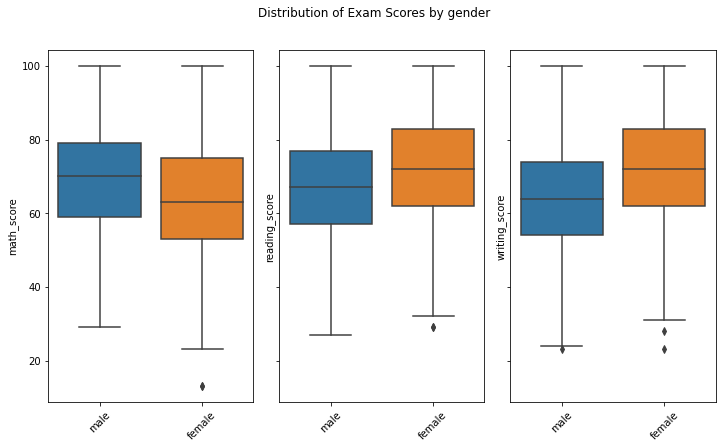

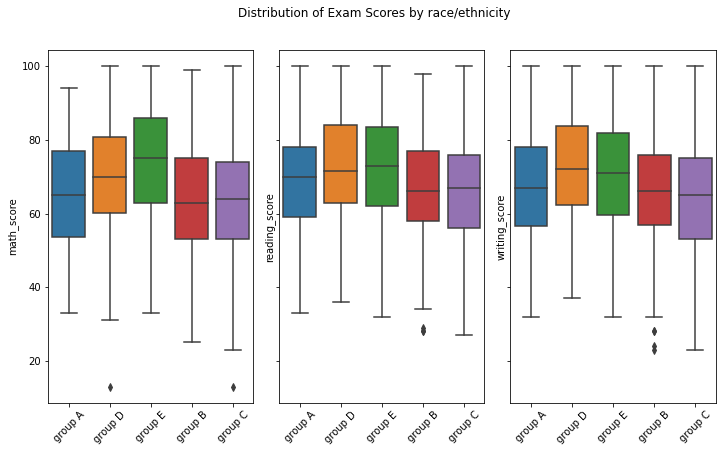

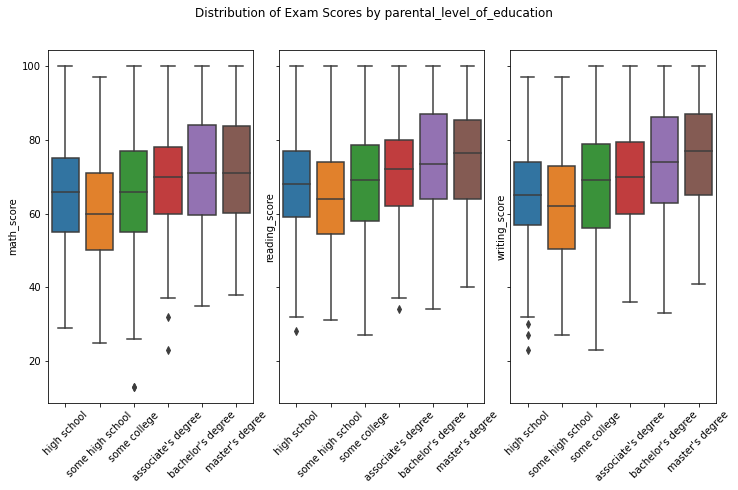

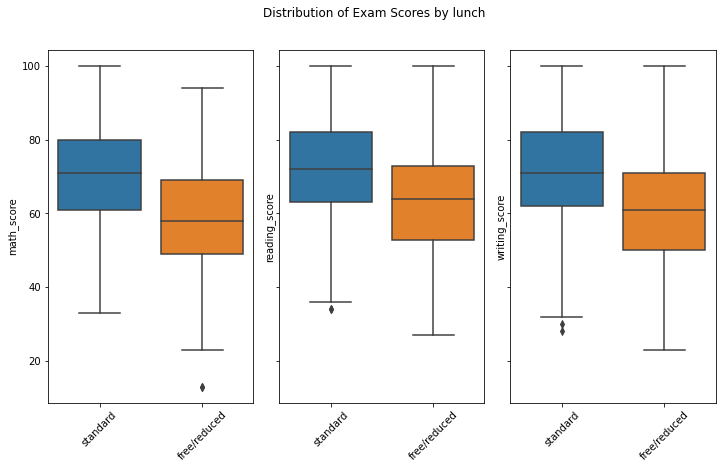

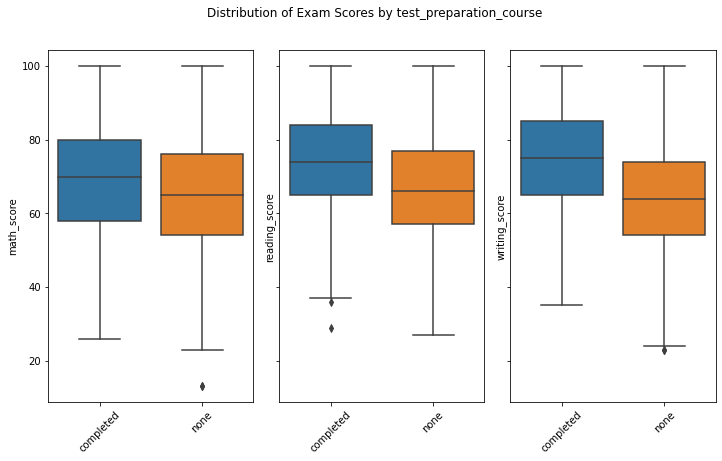

In [17]:
# Visualizing the distribution of each performance metric by category
for var in categorical_var:
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharey="row", sharex = "row", figsize=(10, 6))
    plt.tight_layout(w_pad=1)
    plt.suptitle("Distribution of Exam Scores by {}".format(var))
    plt.xlabel(var)
    f.subplots_adjust(top=0.88)
    plot_index = 0

    # Creating a box_plot function
    def box_plot(var, score, plot_index):
        df = student_performance
        plot = sns.boxplot(data=df, x=var, y=score, ax=axes[plot_index])
        plot.set(xlabel=None)
        return plot

    for score in student_performance.columns[-3:]:
        box_plot(var, score, plot_index) # call to function 
        for ax in f.axes: # iterating through each axes of the figure
            plt.sca(ax) # set iterated plot as the active axes
            plt.xticks(rotation=45) # rotating xlabels object of the axes  
        plot_index += 1

## Part 2: Binary Logistic Regression

#### 1. Checking for Multicollinearity Among Predictors

In [18]:
# creating new dataframe 
test_Df = student_performance.copy()

In [19]:
# recoding for each category for each categorical variable
for col in list(test_Df.columns[:-3]):
    d = {} # Creating hashmap of key-value pairs of each category to recoded value
    recode = 1
    for val in list(test_Df[col].unique()):
        d[val] = d.get(val, recode)
        recode += 1
    test_Df[col] = test_Df[col].replace(d) # replacing values in col with recoded values 

test_Df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,1,1,1,67,67,63
1,2,2,2,2,2,40,59,55
2,1,3,3,2,2,59,60,50
3,1,4,1,1,2,77,78,68
4,1,3,4,1,1,78,73,68


In [20]:
# new dataframe containing only predictors
predictors_df = test_Df.drop(["math_score", "reading_score", "writing_score"], axis = 1).copy()
predictors_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,1,1,1,1,1
1,2,2,2,2,2
2,1,3,3,2,2
3,1,4,1,1,2
4,1,3,4,1,1


<AxesSubplot:>

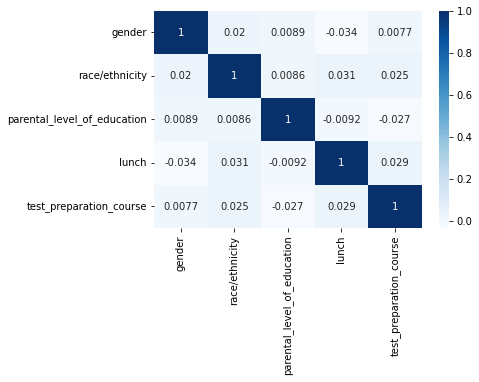

In [21]:
# creating a correlation matrix heat map and identifying any high covariates
sns.heatmap(predictors_df.corr(), annot=True, cmap="Blues")


Based on results of the correlation matrix, there does not appear to be evidence of multicollinearity among predictors. As a result, no categories will need to be exlcuded from the analysis.

#### 2. Converting Target Variables into Binary Outcomes of above or below the average

In [22]:
# printing average performances of students for each exam
print(summary.loc["mean"])

math_score       66.4
reading_score    69.0
writing_score    67.7
Name: mean, dtype: float64


In [23]:
# getting list of columns
list(student_performance.columns)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [24]:
# Since we are predicting students with above average performances, we will recoding math, reading, and writing score as 0 - below the mean, 1 - above the mean
# Creating functions to replace math, reading, and writing scores as 0 or 1
def above_below_math(score):
    avg = summary.loc["mean"]["math_score"]
    if score > avg:
        return 1 # above
    else:
        return 0 # below

def above_below_reading(score):
    avg = summary.loc["mean"]["reading_score"]
    if score > avg:
        return 1 # above
    else:
        return 0 # below

def above_below_writing(score):
    avg = summary.loc["mean"]["writing_score"]
    if score > avg:
        return 1 # above
    else:
        return 0 # below

new_df = student_performance.copy() # create a copy of the student_performance dataframe as new_df
new_df[["math_score", "reading_score", "writing_score"]] = new_df.apply(
        {
            "math_score":above_below_math, 
            "reading_score": above_below_reading,
            "writing_score": above_below_writing
        }, 
        axis = 0
    )
new_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,1,0,0
1,female,group D,some high school,free/reduced,none,0,0,0
2,male,group E,some college,free/reduced,none,0,0,0
3,male,group B,high school,standard,none,1,1,1
4,male,group E,associate's degree,standard,completed,1,1,1


#### 3. Converting Features to Categorical Data Types and Creating Dummy Variables

In [25]:
# Display data types of dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
# Convert features into category
for col in list(new_df.columns)[:-3]:
    new_df[col] = new_df[col].astype("category")

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental_level_of_education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


In [27]:
new_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,1,0,0
1,female,group D,some high school,free/reduced,none,0,0,0
2,male,group E,some college,free/reduced,none,0,0,0
3,male,group B,high school,standard,none,1,1,1
4,male,group E,associate's degree,standard,completed,1,1,1


In [28]:
# Creating dummy variables
for col in list(new_df.columns[:-3]):
    new_df = pd.get_dummies(new_df, columns=[col])

new_df.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


In [29]:
new_df.columns

Index(['math_score', 'reading_score', 'writing_score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental_level_of_education_associate's degree',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test_preparation_course_completed',
       'test_preparation_course_none'],
      dtype='object')

In [30]:
# Dropping Redundant Dummies - omitting categories with highest samples
new_df = new_df.drop(labels=["gender_male", 'race/ethnicity_group C', 'parental_level_of_education_some college', 'lunch_standard', 'test_preparation_course_none'], axis = 1)

In [31]:
# retreiving list of column names
new_df.columns

Index(['math_score', 'reading_score', 'writing_score', 'gender_female',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental_level_of_education_associate's degree',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some high school', 'lunch_free/reduced',
       'test_preparation_course_completed'],
      dtype='object')

####  4. Fitting Logistic Regression Model

In [32]:
# Creating a function that fits a logistic model to the data of the desired metric
def fit_logit(score:str):
   # defining feature matrix for the model
   feature_matrix = new_df[['gender_female',
      'race/ethnicity_group A', 'race/ethnicity_group B',
      'race/ethnicity_group D', 'race/ethnicity_group E',
      "parental_level_of_education_associate's degree",
      "parental_level_of_education_bachelor's degree",
      'parental_level_of_education_high school',
      "parental_level_of_education_master's degree",
      'parental_level_of_education_some high school', 'lunch_free/reduced',
      'test_preparation_course_completed']]
   X_label = feature_matrix
   # adding intercept to the model
   X_label = sm.add_constant(X_label)
   # defining model target/label 
   y = new_df[score]

   logit_model=sm.Logit(y, X_label) # creating instance of the logistic regression model
   result=logit_model.fit() # fitting model to the data
   
   return result

In [33]:
# Fitting logistic regression in predicting above average student performance in math
logit_math = fit_logit("math_score")
logit_math.summary()

Optimization terminated successfully.
         Current function value: 0.580469
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             math_score   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           12
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                  0.1626
Time:                        21:49:44   Log-Likelihood:                -580.47
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.837e-41
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3399      0.205      1.654      0.098      -0.063       0.743
gender_female                                     -0.8697      0.145     -5.989      0.000      -1.154      -0.585
race/ethnicity_group A                             0.0521      0.280      0.186      0.852      -0.497       0.601
race/ethnicity_group B                            -0.0670      0.200     -0.335      0.738      -0.459       0.325
race/ethnicity_group D                             0.6637      0.187      3.552      0.000       0.297       1.030
race/ethnicity_group E                             1.3908      0.244      5.708      0.000       0.913       1.868
parental_level_of_education_associate's degree     0.4123      0.217      1.897      0.058      -0.014       0.838
parental_level_of_education_bachelor's degree      0.4077      0.261      1.563      0.118      -0.104       0.919
parental_level_of_education_high school           -0.1388      0.216     -0.642      0.521      -0.563       0.285
parental_level_of_education_master's degree        0.7907      0.309      2.558      0.011       0.185       1.397
parental_level_of_education_some high school      -0.6447      0.225     -2.862      0.004      -1.086      -0.203
lunch_free/reduced                                -1.5295      0.160     -9.588      0.000      -1.842      -1.217
test_preparation_course_completed                  0.6476      0.152      4.250      0.000       0.349       0.946
==================================================================================================================
"""

In [34]:
# Fitting logistic regression in predicting above average student performance in reading
logit_reading = fit_logit("reading_score")
logit_reading.summary()

Optimization terminated successfully.
         Current function value: 0.609230
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          reading_score   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           12
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                  0.1208
Time:                        21:49:44   Log-Likelihood:                -609.23
converged:                       True   LL-Null:                       -692.95
Covariance Type:            nonrobust   LLR p-value:                 1.598e-29
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5865      0.203     -2.891      0.004      -0.984      -0.189
gender_female                                      0.6903      0.141      4.908      0.000       0.415       0.966
race/ethnicity_group A                             0.2710      0.274      0.990      0.322      -0.266       0.808
race/ethnicity_group B                            -0.0343      0.195     -0.176      0.860      -0.416       0.347
race/ethnicity_group D                             0.6735      0.182      3.698      0.000       0.317       1.031
race/ethnicity_group E                             0.9271      0.230      4.034      0.000       0.477       1.378
parental_level_of_education_associate's degree     0.3807      0.210      1.810      0.070      -0.032       0.793
parental_level_of_education_bachelor's degree      0.4926      0.256      1.923      0.054      -0.009       0.995
parental_level_of_education_high school           -0.1387      0.210     -0.660      0.510      -0.551       0.273
parental_level_of_education_master's degree        0.7166      0.309      2.318      0.020       0.111       1.323
parental_level_of_education_some high school      -0.5118      0.216     -2.370      0.018      -0.935      -0.089
lunch_free/reduced                                -1.0736      0.148     -7.256      0.000      -1.364      -0.784
test_preparation_course_completed                  0.9082      0.149      6.085      0.000       0.616       1.201
==================================================================================================================
"""

In [35]:
# Fitting logistic regression in predicting above average student performance in writing
logit_writing = fit_logit("writing_score")
logit_writing.summary()

Optimization terminated successfully.
         Current function value: 0.575441
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          writing_score   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           12
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                  0.1696
Time:                        21:49:44   Log-Likelihood:                -575.44
converged:                       True   LL-Null:                       -692.95
Covariance Type:            nonrobust   LLR p-value:                 1.810e-43
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7273      0.210     -3.464      0.001      -1.139      -0.316
gender_female                                      0.9875      0.147      6.715      0.000       0.699       1.276
race/ethnicity_group A                             0.0541      0.283      0.191      0.849      -0.501       0.610
race/ethnicity_group B                             0.0340      0.202      0.168      0.867      -0.362       0.430
race/ethnicity_group D                             0.8610      0.190      4.525      0.000       0.488       1.234
race/ethnicity_group E                             0.7859      0.235      3.340      0.001       0.325       1.247
parental_level_of_education_associate's degree     0.2432      0.217      1.121      0.262      -0.182       0.668
parental_level_of_education_bachelor's degree      0.5584      0.268      2.081      0.037       0.033       1.084
parental_level_of_education_high school           -0.4767      0.218     -2.187      0.029      -0.904      -0.049
parental_level_of_education_master's degree        0.6079      0.320      1.900      0.057      -0.019       1.235
parental_level_of_education_some high school      -0.8389      0.225     -3.733      0.000      -1.279      -0.398
lunch_free/reduced                                -1.0821      0.154     -7.039      0.000      -1.383      -0.781
test_preparation_course_completed                  1.3340      0.158      8.442      0.000       1.024       1.644
==================================================================================================================
"""